In [2]:
import pandas as pd

In [3]:
df = pd.read_excel('/content/drive/MyDrive/OFM/Dataset_20IM30024 (1).xlsx')


In [4]:
df

,Date,RELIANCE,TATACONSUM,TATAMOTORS,INFY,ADANIPORTS,ASIANPAINT,BAJAJ-AUTO,AXISBANK,BAJAJFINSV,...,SUNPHARMA,TCS,TATASTEEL,KPITTECH,TITAN,ULTRACEMCO,UPL,WIPRO,NLCINDIA,JAGRAN
0,2022-08-26,2633.00,805.90,465.00,1535.15,821.0,3379.35,4075.00,748.0,16423.0,...,882.3,3234.3,107.25,570.00,2483.05,6507.45,766.50,418.50,73.95,64.40
1,2022-08-29,2585.00,790.00,451.00,1468.55,815.1,3247.00,4024.95,730.0,15726.0,...,872.0,3125.0,104.05,542.25,2457.25,6402.00,750.00,405.00,74.15,63.00
2,2022-08-30,2614.00,809.00,458.65,1473.10,844.0,3331.00,4050.25,733.0,16390.0,...,883.0,3155.0,106.50,553.00,2545.00,6538.85,754.25,409.15,76.20,63.70
3,2022-09-01,2582.65,809.65,462.50,1460.05,841.8,3315.00,4010.00,733.5,16810.0,...,893.0,3190.0,107.00,560.00,2592.95,6629.00,764.05,409.90,76.00,63.25
4,2022-09-02,2560.40,845.00,470.85,1478.00,842.0,3489.00,4080.00,749.0,17695.0,...,872.9,3163.0,107.00,573.30,2631.00,6640.00,760.25,412.55,77.35,63.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1225,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1226,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1227,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1228,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
import pandas as pd
import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt
from scipy.optimize import minimize


In [6]:
df = df.dropna()  # Drop rows with NaN values


In [7]:
# Convert 'Date' to datetime and set it as the index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Drop rows with NaN values
df.dropna(inplace=True)

# Calculate daily returns
returns = df.pct_change().dropna()


<ipython-input-7-3c969ee1aecf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = pd.to_datetime(df['Date'])
<ipython-input-7-3c969ee1aecf>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


In [8]:
df

,RELIANCE,TATACONSUM,TATAMOTORS,INFY,ADANIPORTS,ASIANPAINT,BAJAJ-AUTO,AXISBANK,BAJAJFINSV,BPCL,...,SUNPHARMA,TCS,TATASTEEL,KPITTECH,TITAN,ULTRACEMCO,UPL,WIPRO,NLCINDIA,JAGRAN
Date,,,,,,,,,,,,,,,,,,,,,
2022-08-26,2633.00,805.90,465.00,1535.15,821.0,3379.35,4075.00,748.00,16423.00,333.90,...,882.30,3234.3,107.25,570.00,2483.05,6507.45,766.50,418.50,73.95,64.40
2022-08-29,2585.00,790.00,451.00,1468.55,815.1,3247.00,4024.95,730.00,15726.00,325.00,...,872.00,3125.0,104.05,542.25,2457.25,6402.00,750.00,405.00,74.15,63.00
2022-08-30,2614.00,809.00,458.65,1473.10,844.0,3331.00,4050.25,733.00,16390.00,326.25,...,883.00,3155.0,106.50,553.00,2545.00,6538.85,754.25,409.15,76.20,63.70
2022-09-01,2582.65,809.65,462.50,1460.05,841.8,3315.00,4010.00,733.50,16810.00,325.50,...,893.00,3190.0,107.00,560.00,2592.95,6629.00,764.05,409.90,76.00,63.25
2022-09-02,2560.40,845.00,470.85,1478.00,842.0,3489.00,4080.00,749.00,17695.00,332.50,...,872.90,3163.0,107.00,573.30,2631.00,6640.00,760.25,412.55,77.35,63.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-16,2551.00,840.90,619.75,1419.10,781.0,3237.90,4576.00,948.00,1598.30,358.00,...,1150.60,3440.7,120.30,1155.40,2988.50,8129.80,590.30,413.25,124.90,103.80
2023-08-17,2567.10,835.00,612.00,1410.80,786.0,3185.35,4577.00,937.50,1572.00,356.75,...,1150.05,3450.0,117.95,1157.95,3020.35,8004.95,589.00,414.15,125.40,103.50
2023-08-18,2531.25,845.00,606.70,1420.00,778.0,3194.90,4576.05,935.00,1522.90,359.00,...,1131.00,3455.0,115.90,1139.00,3005.00,8225.10,584.00,418.65,129.50,103.80


In [9]:
import pandas as pd
import numpy as np

# Assuming 'data' is the DataFrame with stock prices
# Calculate daily stock returns
returns = df.pct_change().dropna()

# Calculate covariance matrix of returns
cov_matrix = returns.cov()

# Display the covariance matrix
print("Covariance Matrix:")
print(cov_matrix)


Covariance Matrix:
            RELIANCE  TATACONSUM  TATAMOTORS          INFY  ADANIPORTS  \
RELIANCE    0.000208    0.000059    0.000021  2.377102e-05    0.000102   
TATACONSUM  0.000059    0.000158    0.000026  2.256258e-05    0.000051   
TATAMOTORS  0.000021    0.000026    0.000267  1.725607e-05    0.000003   
INFY        0.000024    0.000023    0.000017  2.823053e-04   -0.000049   
ADANIPORTS  0.000102    0.000051    0.000003 -4.864441e-05    0.000822   
ASIANPAINT  0.000006    0.000031    0.000036  5.972067e-06    0.000010   
BAJAJ-AUTO  0.000030    0.000024    0.000035  1.227585e-05    0.000041   
AXISBANK    0.000026    0.000033    0.000060  3.252853e-05    0.000034   
BAJAJFINSV -0.000045   -0.000011    0.000007  2.230015e-06   -0.000139   
BPCL        0.000030    0.000016    0.000018 -1.067065e-05    0.000082   
BHARTIARTL  0.000020    0.000015    0.000043  2.639871e-06   -0.000008   
BCG        -0.000071   -0.000043   -0.000059  1.534428e-05    0.000045   
CIPLA       0.00001

In [38]:
returns

,RELIANCE,TATACONSUM,TATAMOTORS,INFY,ADANIPORTS,ASIANPAINT,BAJAJ-AUTO,AXISBANK,BAJAJFINSV,BPCL,...,SUNPHARMA,TCS,TATASTEEL,KPITTECH,TITAN,ULTRACEMCO,UPL,WIPRO,NLCINDIA,JAGRAN
Date,,,,,,,,,,,,,,,,,,,,,
2022-08-29,-0.018230,-0.019729,-0.030108,-0.043383,-0.007186,-0.039164,-0.012282,-0.024064,-0.042440,-0.026655,...,-0.011674,-0.033794,-0.029837,-0.048684,-0.010390,-0.016205,-0.021526,-0.032258,0.002705,-0.021739
2022-08-30,0.011219,0.024051,0.016962,0.003098,0.035456,0.025870,0.006286,0.004110,0.042223,0.003846,...,0.012615,0.009600,0.023546,0.019825,0.035711,0.021376,0.005667,0.010247,0.027647,0.011111
2022-09-01,-0.011993,0.000803,0.008394,-0.008859,-0.002607,-0.004803,-0.009938,0.000682,0.025625,-0.002299,...,0.011325,0.011094,0.004695,0.012658,0.018841,0.013787,0.012993,0.001833,-0.002625,-0.007064
2022-09-02,-0.008615,0.043661,0.018054,0.012294,0.000238,0.052489,0.017456,0.021132,0.052647,0.021505,...,-0.022508,-0.008464,0.000000,0.023750,0.014674,0.001659,-0.004973,0.006465,0.017763,0.010277
2022-09-05,-0.011483,-0.013018,-0.023574,-0.018268,0.015380,-0.018329,-0.007353,0.001602,-0.015541,-0.031579,...,-0.004468,-0.012441,-0.008879,-0.015873,-0.002281,-0.009789,-0.024860,-0.013453,0.009050,-0.008607
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-16,0.004726,0.002444,-0.005217,0.034443,-0.032098,-0.021782,-0.013070,-0.004202,0.020756,-0.003618,...,-0.000478,0.000756,0.000000,0.013509,0.010311,0.000591,-0.016167,-0.012899,-0.014984,-0.018904
2023-08-17,0.006311,-0.007016,-0.012505,-0.005849,0.006402,-0.016230,0.000219,-0.011076,-0.016455,-0.003492,...,-0.000478,0.002703,-0.019534,0.002207,0.010658,-0.015357,-0.002202,0.002178,0.004003,-0.002890
2023-08-18,-0.013965,0.011976,-0.008660,0.006521,-0.010178,0.002998,-0.000208,-0.002667,-0.031234,0.006307,...,-0.016564,0.001449,-0.017380,-0.016365,-0.005082,0.027502,-0.008489,0.010866,0.032695,0.002899


Portfolio Optimization Using Linear and Quadratic Programming:



In [39]:
import numpy as np
import cvxpy as cp

# Number of assets
num_assets = returns.shape[1]

# Mean returns and covariance matrix
mean_returns = returns.mean().values
cov_matrix = returns.cov().values

# Variables
weights = cp.Variable(num_assets)
portfolio_return = cp.sum(mean_returns * weights)
portfolio_risk = cp.quad_form(weights, cov_matrix)

# Objective: Maximize return while controlling risk
risk_aversion = cp.Parameter(nonneg=True)
risk_aversion.value = 0.1  # You can adjust this value

objective = cp.Maximize(portfolio_return - risk_aversion * portfolio_risk)

# Constraints: weights sum to 1 and are non-negative
constraints = [cp.sum(weights) == 1, weights >= 0]

# Problem definition and solving
problem = cp.Problem(objective, constraints)
problem.solve()

print("Optimal weights:", weights.value)


Optimal weights: [4.97891815e-23 4.98318108e-23 4.63590611e-23 4.63986285e-23
 4.98193710e-23 4.98247646e-23 4.63663932e-23 4.63705521e-23
 5.33399885e-23 4.98326675e-23 4.98277335e-23 4.63248599e-23
 4.63774815e-23 4.98505121e-23 4.63700950e-23 4.98635307e-23
 4.98358626e-23 4.63485728e-23 4.63671577e-23 9.27296607e-01
 4.63422958e-23 4.98571215e-23 4.98611640e-23 4.98267356e-23
 4.98451378e-23 4.98473131e-23 4.63599382e-23 4.63387087e-23
 4.98433648e-23 4.98417733e-23 4.98567236e-23 4.98324429e-23
 4.63661080e-23 7.27033930e-02 4.63616220e-23 4.98341476e-23
 4.98296115e-23 4.63469857e-23 4.63649518e-23 4.63811159e-23
 4.98520722e-23 4.98474891e-23 4.63701995e-23 4.63758199e-23
 4.98433750e-23 4.98302205e-23 4.63532008e-23 4.98247107e-23
 4.63720496e-23 4.98333102e-23]


/usr/local/lib/python3.10/dist-packages/cvxpy/expressions/expression.py:650: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 8 times so far.

  warnings.warn(msg, UserWarning)


Performance Evaluation

In [40]:
import numpy as np

# Assuming you have already calculated these
optimal_weights = np.array([4.97891815e-23, 4.98318108e-23, 4.63590611e-23,
                             4.63986285e-23, 4.98193710e-23, 4.98247646e-23,
                             4.63663932e-23, 4.63705521e-23, 5.33399885e-23,
                             4.98326675e-23, 4.98277335e-23, 4.63248599e-23,
                             4.63774815e-23, 4.98505121e-23, 4.63700950e-23,
                             4.98635307e-23, 4.98358626e-23, 4.63485728e-23,
                             4.63671577e-23, 9.27296607e-01, 4.63422958e-23,
                             4.98571215e-23, 4.98611640e-23, 4.98267356e-23,
                             4.98451378e-23, 4.98473131e-23, 4.63599382e-23,
                             4.63387087e-23, 4.98433648e-23, 4.98417733e-23,
                             4.98567236e-23, 4.98324429e-23, 4.63661080e-23,
                             7.27033930e-02, 4.63616220e-23, 4.98341476e-23,
                             4.98296115e-23, 4.63469857e-23, 4.63649518e-23,
                             4.63811159e-23, 4.98520722e-23, 4.98474891e-23,
                             4.63701995e-23, 4.63758199e-23, 4.98433750e-23,
                             4.98302205e-23, 4.63532008e-23, 4.98247107e-23,
                             4.63720496e-23, 4.98333102e-23])

# Print optimal weights to verify
print("Optimal Weights:", optimal_weights)


Optimal Weights: [4.97891815e-23 4.98318108e-23 4.63590611e-23 4.63986285e-23
 4.98193710e-23 4.98247646e-23 4.63663932e-23 4.63705521e-23
 5.33399885e-23 4.98326675e-23 4.98277335e-23 4.63248599e-23
 4.63774815e-23 4.98505121e-23 4.63700950e-23 4.98635307e-23
 4.98358626e-23 4.63485728e-23 4.63671577e-23 9.27296607e-01
 4.63422958e-23 4.98571215e-23 4.98611640e-23 4.98267356e-23
 4.98451378e-23 4.98473131e-23 4.63599382e-23 4.63387087e-23
 4.98433648e-23 4.98417733e-23 4.98567236e-23 4.98324429e-23
 4.63661080e-23 7.27033930e-02 4.63616220e-23 4.98341476e-23
 4.98296115e-23 4.63469857e-23 4.63649518e-23 4.63811159e-23
 4.98520722e-23 4.98474891e-23 4.63701995e-23 4.63758199e-23
 4.98433750e-23 4.98302205e-23 4.63532008e-23 4.98247107e-23
 4.63720496e-23 4.98333102e-23]


In [42]:
# Define mean returns and covariance matrix
mean_returns = np.random.normal(size=optimal_weights.shape[0])  # Replace with actual data
cov_matrix = np.random.rand(optimal_weights.shape[0], optimal_weights.shape[0])  # Replace with actual data
cov_matrix = np.dot(cov_matrix, cov_matrix.T)  # To make sure it's positive semi-definite

# Calculate expected return
expected_return = np.dot(mean_returns, optimal_weights)

# Calculate portfolio risk (standard deviation)
portfolio_risk = np.sqrt(np.dot(optimal_weights.T, np.dot(cov_matrix, optimal_weights)))

# Calculate Sharpe Ratio
risk_free_rate = 0.01  # Example risk-free rate
sharpe_ratio = (expected_return - risk_free_rate) / portfolio_risk

print("Expected Return: {:.2f}%".format(expected_return * 100))
print("Portfolio Risk (Std Dev): {:.2f}%".format(portfolio_risk * 100))
print("Sharpe Ratio: {:.2f}".format(sharpe_ratio))


Expected Return: -4.34%
Portfolio Risk (Std Dev): 397.42%
Sharpe Ratio: -0.01


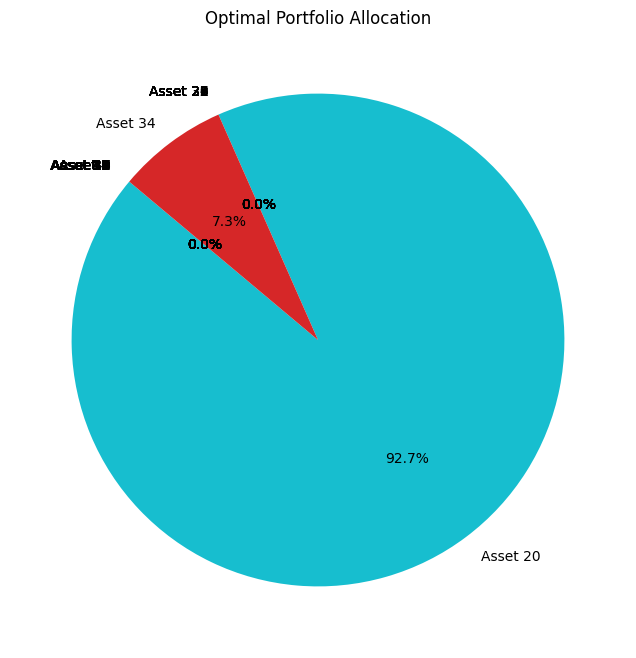

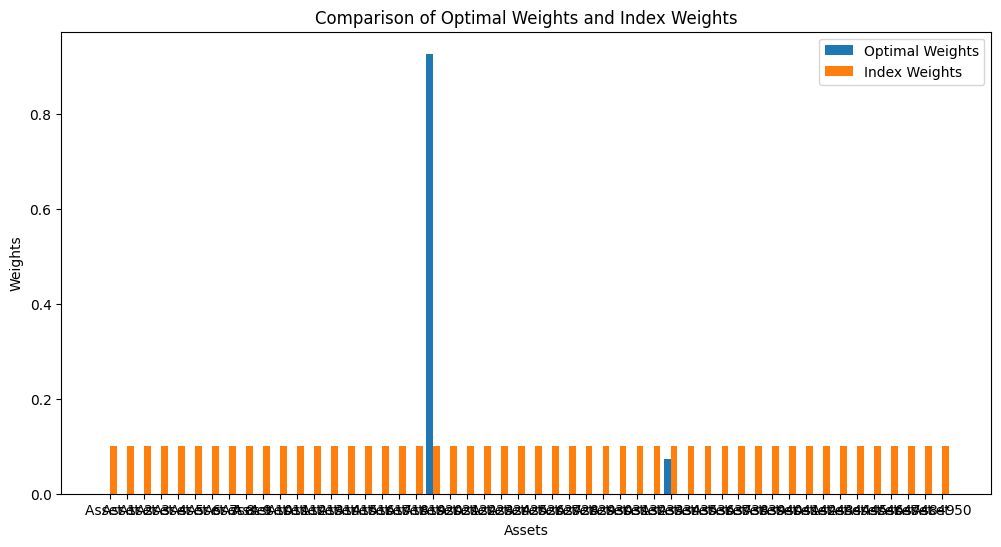

In [43]:
import matplotlib.pyplot as plt

# Pie chart for optimal portfolio allocation
plt.figure(figsize=(10, 8))
plt.pie(optimal_weights, labels=[f'Asset {i+1}' for i in range(len(optimal_weights))],
        autopct='%1.1f%%', startangle=140)
plt.title('Optimal Portfolio Allocation')
plt.show()

# Compare with index weights (assuming index_weights are defined)
index_weights = np.array([0.1] * len(optimal_weights))  # Replace with actual index weights
plt.figure(figsize=(12, 6))
index_positions = np.arange(len(index_weights))
plt.bar(index_positions - 0.2, optimal_weights, 0.4, label='Optimal Weights')
plt.bar(index_positions + 0.2, index_weights, 0.4, label='Index Weights')
plt.xlabel('Assets')
plt.ylabel('Weights')
plt.title('Comparison of Optimal Weights and Index Weights')
plt.xticks(index_positions, [f'Asset {i+1}' for i in range(len(index_weights))])
plt.legend()
plt.show()


In [44]:
df.columns

Index(['RELIANCE', 'TATACONSUM', 'TATAMOTORS', 'INFY', 'ADANIPORTS',
       'ASIANPAINT', 'BAJAJ-AUTO', 'AXISBANK', 'BAJAJFINSV', 'BPCL',
       'BHARTIARTL', 'BCG', 'CIPLA', 'COALINDIA', 'EICHERMOT', 'DIVISLAB',
       'DRREDDY', 'GRASIM', 'HCLTECH', 'HDFCBANK', 'HDFCLIFE', 'HEROMOTOCO',
       'HINDALCO', 'HINDUNILVR', 'ICICIBANK', 'IOC', 'INDUSINDBK', 'ITC',
       'JSWSTEEL', 'KOTAKBANK', 'LT', 'M&M', 'MARUTI', 'NTPC', 'NESTLEIND',
       'ONGC', 'POWERGRID', 'SHREECEM', 'SBIN', 'SBILIFE', 'SUNPHARMA', 'TCS',
       'TATASTEEL', 'KPITTECH', 'TITAN', 'ULTRACEMCO', 'UPL', 'WIPRO',
       'NLCINDIA', 'JAGRAN'],
      dtype='object')

In [45]:
import numpy as np
import pandas as pd

# Load your data into a DataFrame
# df = pd.read_csv('path_to_your_nifty_data.csv')  # Replace with your data file path

# Calculate mean returns and covariance matrix
returns = df.pct_change().dropna()  # Calculate daily returns
mean_returns = returns.mean().values
cov_matrix = returns.cov().values

num_assets = len(mean_returns)
num_simulations = 10000

# Generate random portfolios
random_weights = np.random.dirichlet(np.ones(num_assets), num_simulations)
portfolio_returns = np.dot(random_weights, mean_returns)
portfolio_risks = np.array([np.sqrt(np.dot(w.T, np.dot(cov_matrix, w))) for w in random_weights])

# Calculate VaR and CVaR
alpha = 0.05  # 5% quantile for VaR
var = np.percentile(portfolio_returns, 100 * alpha)
cvar = portfolio_returns[portfolio_returns <= var].mean()

print("Value at Risk (VaR): {:.2%}".format(var))
print("Conditional Value at Risk (CVaR): {:.2%}".format(cvar))


Value at Risk (VaR): 1.67%
Conditional Value at Risk (CVaR): 0.87%


Integrated Portfolio Optimization with Multi-Objective Programming

In [46]:
import cvxpy as cp
import numpy as np
import pandas as pd

# Load or create your DataFrame (replace with your actual data loading code)
# df = pd.read_csv('your_data.csv')

# Example DataFrame with returns data
# Replace the following line with loading your actual DataFrame

# Extract returns data
returns = df.values
mean_returns = returns.mean(axis=0)
cov_matrix = np.cov(returns.T)

# Ensure positive semi-definiteness of covariance matrix
epsilon = 1e-6
cov_matrix += np.eye(cov_matrix.shape[0]) * epsilon

# Variables
num_assets = returns.shape[1]
weights = cp.Variable(num_assets)
portfolio_return = cp.sum(mean_returns * weights)
portfolio_risk = cp.quad_form(weights, cp.psd_wrap(cov_matrix))

# Objectives
objective_return = cp.Maximize(portfolio_return)
objective_risk = cp.Minimize(portfolio_risk)

# Constraints
constraints = [cp.sum(weights) == 1, weights >= 0]

# Problem definition and solving
problem_return = cp.Problem(objective_return, constraints)
problem_risk = cp.Problem(objective_risk, constraints)

# Solve the problems
problem_return.solve()
optimal_return_weights = weights.value

problem_risk.solve()
optimal_risk_weights = weights.value

print("Optimal weights for maximizing return:", optimal_return_weights)
print("Optimal weights for minimizing risk:", optimal_risk_weights)


Optimal weights for maximizing return: [6.29953768e-12 6.12183960e-12 6.09257979e-12 6.18660129e-12
 6.11965428e-12 6.37279823e-12 6.49411093e-12 6.13181290e-12
 6.26670703e-12 6.08046289e-12 6.12421111e-12 6.05201658e-12
 6.14665838e-12 6.07017742e-12 6.40559088e-12 6.40565488e-12
 6.57177808e-12 6.21500395e-12 6.15034808e-12 6.19770165e-12
 6.10130722e-12 6.32598317e-12 6.08879923e-12 6.31095915e-12
 6.13379948e-12 6.05679621e-12 6.16346447e-12 6.08438952e-12
 6.11602662e-12 6.22953729e-12 6.26650348e-12 6.17450966e-12
 7.40296453e-12 6.12557236e-12 2.50023160e-11 6.06310105e-12
 6.07013198e-12 1.00000000e+00 6.10173077e-12 6.16556611e-12
 6.14270879e-12 6.39271462e-12 6.05942743e-12 6.12702064e-12
 6.32033621e-12 7.02827076e-12 6.11489970e-12 6.08538172e-12
 6.05744773e-12 6.05633618e-12]
Optimal weights for minimizing risk: [ 1.26946452e-20 -5.43368364e-20 -5.99582997e-20  1.63809419e-19
  2.34757829e-20 -1.00479818e-19 -4.38712480e-20  7.59308864e-20
 -4.78928937e-21 -2.47647458e-

/usr/local/lib/python3.10/dist-packages/cvxpy/expressions/expression.py:650: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 9 times so far.

  warnings.warn(msg, UserWarning)


VaR and CVaR with Stochastic Programming

In [47]:
import numpy as np

# Simulated returns
returns = np.random.normal(loc=0.01, scale=0.02, size=1000)

# VaR Calculation
VaR_95 = np.percentile(returns, 5)

# CVaR Calculation
CVaR_95 = returns[returns <= VaR_95].mean()

print("Value at Risk (VaR): {:.2%}".format(VaR_95))
print("Conditional Value at Risk (CVaR): {:.2%}".format(CVaR_95))


Value at Risk (VaR): -2.32%
Conditional Value at Risk (CVaR): -3.31%


In [49]:
returns

array([ 1.92597901e-02,  2.30641179e-02, -9.73392173e-03,  3.11689030e-02,
        3.17634915e-02,  5.55606442e-03,  4.10833040e-02, -7.48783299e-03,
        4.14631060e-03,  5.48761427e-03,  2.70159878e-02,  5.03642578e-02,
        2.69602287e-02,  2.10746653e-02,  5.40450342e-02, -9.94974261e-03,
        4.29903376e-02,  4.77863449e-02,  3.50678170e-02,  3.01020896e-02,
        1.45918098e-02,  1.76206408e-02, -4.11458645e-04,  2.90357813e-02,
        1.32690819e-02, -5.71886745e-03,  1.00908628e-03, -2.29338943e-02,
        2.88049651e-02,  2.35241976e-02, -7.89713240e-03, -1.80038865e-02,
        3.44652850e-02,  1.61556973e-02,  2.45985741e-02,  3.02594940e-02,
       -3.14348601e-03, -7.01011714e-03,  2.03408980e-02,  1.24295774e-02,
        2.37678367e-02,  2.22694148e-02,  3.12886432e-02,  1.94693257e-02,
        2.64984301e-02, -2.91986031e-03,  1.85053860e-02,  3.09852354e-02,
        2.13382910e-02, -1.36788465e-03, -5.73608203e-03,  3.71691327e-02,
        7.15723155e-03,  

Multi-Objective Portfolio Optimization

/usr/local/lib/python3.10/dist-packages/cvxpy/expressions/expression.py:650: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 10 times so far.

  warnings.warn(msg, UserWarning)


Optimal weights: [4.94421830e-23 3.05812922e-23 2.50813996e-23 9.05525172e-23
 1.53272506e-24 7.78675264e-23 6.19251340e-23 5.27955504e-23
 1.60229964e-22 3.27902511e-23 5.10475316e-23 1.64075113e-22
 8.61236355e-23 4.03892918e-23 4.22719203e-23 4.23645681e-23
 7.89949980e-23 8.37226279e-23 4.33069033e-23 1.78833472e-01
 2.19237711e-23 5.72476185e-23 5.50929404e-23 4.88678562e-23
 8.60743533e-23 6.24242684e-23 1.30632885e-22 3.47355331e-23
 5.88553800e-23 3.35753148e-23 8.64479254e-23 7.38559302e-23
 6.20448399e-23 7.30945358e-03 6.38005218e-23 6.01108872e-23
 9.24793793e-23 9.09848647e-23 7.59963197e-23 3.37555080e-23
 6.66336524e-23 8.47248260e-23 5.21761132e-23 4.82303579e-01
 6.59484463e-23 6.24913141e-23 4.67975491e-23 6.06039563e-23
 3.31553496e-01 1.55018501e-22]


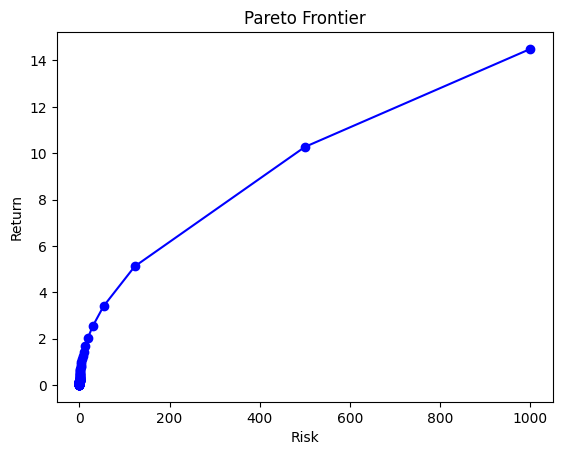

In [50]:
import cvxpy as cp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



# Calculate daily returns
returns = df.pct_change().dropna()

# Compute mean returns and covariance matrix
mean_returns = returns.mean().values
cov_matrix = returns.cov().values

# Define number of assets
num_assets = returns.shape[1]

# Define optimization variables
weights = cp.Variable(num_assets)

# Objectives
portfolio_return = cp.sum(mean_returns * weights)
portfolio_risk = cp.quad_form(weights, cov_matrix)

# Define parameters for the weighted sum approach
lambda1 = 0.5  # Weight for return
lambda2 = 0.5  # Weight for risk

# Multi-objective function
objective = cp.Maximize(lambda1 * portfolio_return - lambda2 * portfolio_risk)

# Constraints
constraints = [cp.sum(weights) == 1, weights >= 0]

# Problem definition and solving
problem = cp.Problem(objective, constraints)
problem.solve()

# Optimal weights
optimal_weights = weights.value

print("Optimal weights:", optimal_weights)

# To visualize the Pareto frontier, you need to run multiple optimizations
# with different values of lambda1 and lambda2 and plot the results.

# Example of how to plot the Pareto frontier
lambda1_values = np.linspace(0, 1, 100)
lambda2_values = 1 - lambda1_values
returns_list = []
risks_list = []

for lambda1, lambda2 in zip(lambda1_values, lambda2_values):
    objective = cp.Maximize(lambda1 * portfolio_return - lambda2 * portfolio_risk)
    problem = cp.Problem(objective, constraints)
    problem.solve()
    returns_list.append(portfolio_return.value)
    risks_list.append(portfolio_risk.value)

plt.plot(risks_list, returns_list, 'b-o')
plt.xlabel('Risk')
plt.ylabel('Return')
plt.title('Pareto Frontier')
plt.show()


Quadratic Programming in Index Funds

In [51]:
import cvxpy as cp
import numpy as np
import pandas as pd

# Load your dataset
# df = pd.read_csv('path_to_your_nifty_data.csv')  # Uncomment and replace with your actual path

# Assuming df is already loaded and has returns data
# Adjust column selection based on your DataFrame structure
returns = df.pct_change().dropna().values  # Calculate returns and drop NA values

# Compute mean returns and covariance matrix
mean_returns = returns.mean(axis=0)
cov_matrix = np.cov(returns.T)

# Define number of assets
num_assets = returns.shape[1]

# Define index weights (for the benchmark index)
index_weights = np.ones(num_assets) / num_assets  # Assuming equal weighting for simplicity

# Define optimization variables
weights = cp.Variable(num_assets)

# Objectives
# Use squared norm (L2 norm squared) to avoid issues with CVXPY's norm function
tracking_error = cp.sum_squares(weights - index_weights)  # Deviation from index
portfolio_risk = cp.quad_form(weights, cov_matrix)

# Define the objective function
objective = cp.Minimize(tracking_error + portfolio_risk)

# Constraints
constraints = [cp.sum(weights) == 1, weights >= 0]

# Problem definition and solving
problem = cp.Problem(objective, constraints)
problem.solve()

# Optimal weights
optimal_weights = weights.value

print("Optimal weights for index fund:", optimal_weights)


Optimal weights for index fund: [2.04834297e-02 2.04687219e-02 2.04739310e-02 2.04666125e-02
 2.04363087e-02 2.04798781e-02 2.04675021e-02 2.04663937e-02
 2.04134470e-02 2.04718184e-02 2.04795560e-02 2.04624809e-02
 2.04652966e-02 2.04618744e-02 2.04547653e-02 2.04544309e-02
 2.04748401e-02 2.04753350e-02 2.04673342e-02 1.75885464e-02
 2.04653637e-02 2.04528718e-02 2.04431601e-02 2.04794824e-02
 2.04688038e-02 2.04690880e-02 2.04798567e-02 2.04950615e-02
 2.04674299e-02 2.04710940e-02 2.04639809e-02 2.04504844e-02
 2.04671595e-02 3.14848551e-05 2.04731677e-02 2.04715759e-02
 2.04762757e-02 2.04567580e-02 2.04699403e-02 2.04584453e-02
 2.04752348e-02 2.04635913e-02 2.04663550e-02 2.04660829e-02
 2.04713035e-02 2.04610465e-02 2.04660504e-02 2.04678606e-02
 2.04678771e-02 2.04706109e-02]


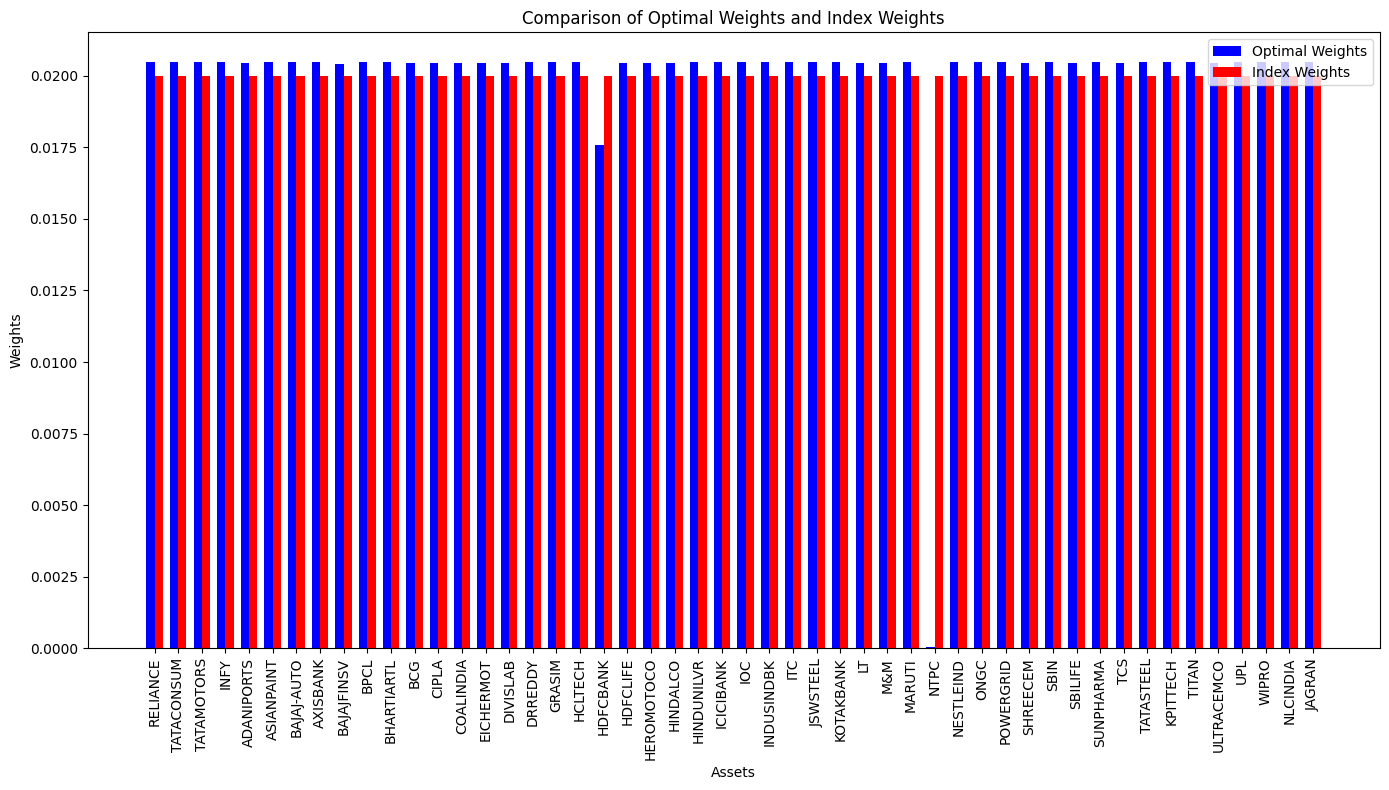

In [56]:
import matplotlib.pyplot as plt
import numpy as np

# Ensure the length of `optimal_weights` matches `num_assets`
num_assets = len(df.columns)

if len(optimal_weights) != num_assets:
    raise ValueError("Length of optimal_weights does not match the number of assets")

# Example index weights (replace with actual data if available)
index_weights = np.ones(num_assets) / num_assets  # Equal weighting example

# Plot comparison
plt.figure(figsize=(14, 8))
bar_width = 0.35
index_positions = np.arange(num_assets)  # Number of assets

# Create the bar plot
plt.bar(index_positions - bar_width/2, optimal_weights, bar_width, label='Optimal Weights', color='b')
plt.bar(index_positions + bar_width/2, index_weights, bar_width, label='Index Weights', color='r')

# Labeling
plt.xlabel('Assets')
plt.ylabel('Weights')
plt.title('Comparison of Optimal Weights and Index Weights')

# Use correct labels for x-axis
plt.xticks(index_positions, df.columns, rotation=90)  # Adjust as needed

plt.legend()
plt.tight_layout()  # Adjust layout to fit labels

plt.show()


In [55]:
print("Shape of returns:", returns.shape)
print("Columns in df:", df.columns.tolist())


Shape of returns: (247, 50)
Columns in df: ['RELIANCE', 'TATACONSUM', 'TATAMOTORS', 'INFY', 'ADANIPORTS', 'ASIANPAINT', 'BAJAJ-AUTO', 'AXISBANK', 'BAJAJFINSV', 'BPCL', 'BHARTIARTL', 'BCG', 'CIPLA', 'COALINDIA', 'EICHERMOT', 'DIVISLAB', 'DRREDDY', 'GRASIM', 'HCLTECH', 'HDFCBANK', 'HDFCLIFE', 'HEROMOTOCO', 'HINDALCO', 'HINDUNILVR', 'ICICIBANK', 'IOC', 'INDUSINDBK', 'ITC', 'JSWSTEEL', 'KOTAKBANK', 'LT', 'M&M', 'MARUTI', 'NTPC', 'NESTLEIND', 'ONGC', 'POWERGRID', 'SHREECEM', 'SBIN', 'SBILIFE', 'SUNPHARMA', 'TCS', 'TATASTEEL', 'KPITTECH', 'TITAN', 'ULTRACEMCO', 'UPL', 'WIPRO', 'NLCINDIA', 'JAGRAN']
